In [8]:
# Step 1: Install Qiskit in Colab (run this once per runtime)
!pip install qiskit qiskit-aer pylatexenc --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [13]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [14]:
# Number of qubits = 2 → 4 options
n = 2
qc = QuantumCircuit(n, n)

# Step 1: Superposition
qc.h(range(n))

# Step 2: Oracle marking 00 (Egypt), 01 (Morocco), 10 (England)
def oracle(qc):
    # Mark |00>
    qc.x(range(n))
    qc.h(1)
    qc.cx(0,1)
    qc.h(1)
    qc.x(range(n))

    # Mark |01>
    qc.x(0)
    qc.h(1)
    qc.cx(0,1)
    qc.h(1)
    qc.x(0)

    # Mark |10>
    qc.x(1)
    qc.h(1)
    qc.cx(0,1)
    qc.h(1)
    qc.x(1)

oracle(qc)

# Step 3: Grover Diffusion
def diffusion(qc, n):
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n-1)
    qc.cx(0,1)
    qc.h(n-1)
    qc.x(range(n))
    qc.h(range(n))

diffusion(qc, n)

# Step 4: Measurement
qc.measure(range(n), range(n))

# Run simulation with AerSimulator
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

# Show results
print("Raw counts:", counts)

# Map bitstrings to country names
mapping = {'00': 'Egypt', '01': 'Morocco', '10': 'England', '11': 'France'}
mapped_counts = {mapping[k]: v for k, v in counts.items()}

# Plot histogram
plot_histogram(mapped_counts)
plt.show()

# Draw circuit
qc.draw("text")

Raw counts: {'11': 1024}


┌───┐┌───┐          ┌───┐┌───┐          ┌───┐               ┌───┐┌───┐»
q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ X ├───────■──┤ X ├────────────■──┤ H ├┤ X ├»
     ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐┌─┴─┐├───┤┌───┐┌───┐┌─┴─┐├───┤├───┤»
q_1: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├»
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
c: 2/══════════════════════════════════════════════════════════════════════»
                                                                           »
«                         ┌───┐┌───┐     ┌─┐   
«q_0: ─────────────────■──┤ X ├┤ H ├─────┤M├───
«     ┌───┐┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐└╥┘┌─┐
«q_1: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫─┤M├
«     └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║ └╥┘
«c: 2/════════════════════════════════════╩══╩═
«                                         0  1

In [17]:
print(counts)

{'11': 1024}


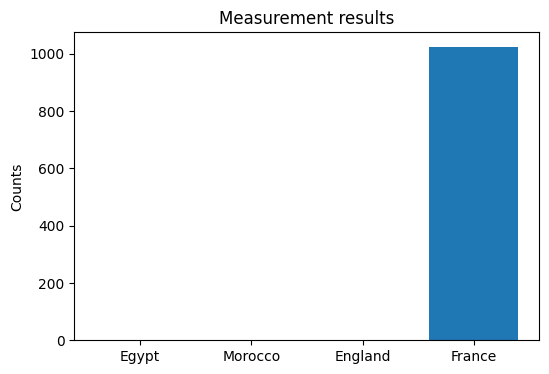

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

mapping = {'00': 'Egypt', '01': 'Morocco', '10': 'England', '11': 'France'}
labels = [mapping[k] for k in ['00','01','10','11']]
values = [counts.get(k, 0) for k in ['00','01','10','11']]

plt.figure(figsize=(6,4))
plt.bar(labels, values)
plt.ylabel("Counts")
plt.title("Measurement results")
plt.show()
